In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
%pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


### Importing Required Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

# Dataset



**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


### Importing Data


In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)
print(df.head())

  Region      Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
0    NSW  1/4/2005              8.68000                      312.266667   
1    NSW  1/5/2005             16.61125                      322.475000   
2    NSW  1/6/2005              5.52000                      325.266667   
3    NSW  1/7/2005              6.26400                      313.870000   
4    NSW  1/8/2005              5.40000                      337.383333   

   Mean_estimated_fire_radiative_power  Mean_confidence  Std_confidence  \
0                            42.400000        78.666667        2.886751   
1                            62.362500        85.500000        8.088793   
2                            38.400000        78.333333        3.214550   
3                            33.800000        92.200000        7.529940   
4                           122.533333        91.000000        7.937254   

   Var_confidence  Count Replaced  
0        8.333333      3        R  
1       65.428571      8  

In [5]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
#data type
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [7]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


In [8]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

In [9]:
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


###  Let's try to understand the change in average estimated fire area over time


In [10]:
# Group the data by year and calculate the average estimated fire area
average_fire_area_by_year = df.groupby('Year')['Estimated_fire_area'].mean()


In [11]:
average_fire_area_by_year


,Estimated_fire_area
Year,
2005,92.770501
2006,176.289434
2007,153.112464
2008,99.758968
2009,141.624955
2010,62.429968
2011,266.936175
2012,265.526196
2013,95.896092


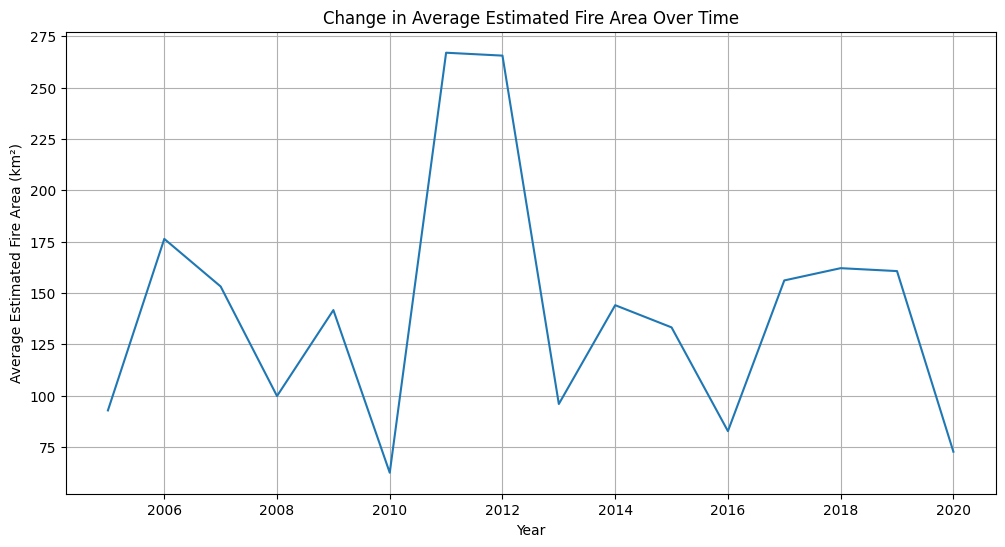

In [12]:


# Plot the average estimated fire area over time
plt.figure(figsize=(12, 6))
plt.plot(average_fire_area_by_year.index, average_fire_area_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Change in Average Estimated Fire Area Over Time')
plt.grid(True)
plt.show()

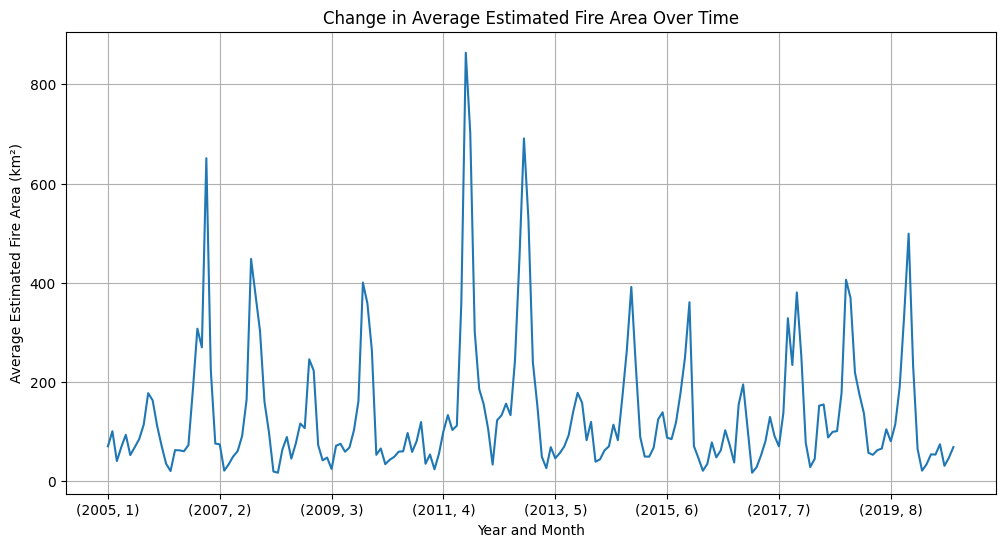

In [13]:

# Group the data by year and month and calculate the average estimated fire area
average_fire_area_by_year_month = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()

# Plot the average estimated fire area over time
plt.figure(figsize=(12, 6))
average_fire_area_by_year_month.plot()
plt.xlabel('Year and Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Change in Average Estimated Fire Area Over Time')
plt.grid(True)
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


###  Let's have an insight on the distribution of mean estimated fire brightness across the regions


In [14]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

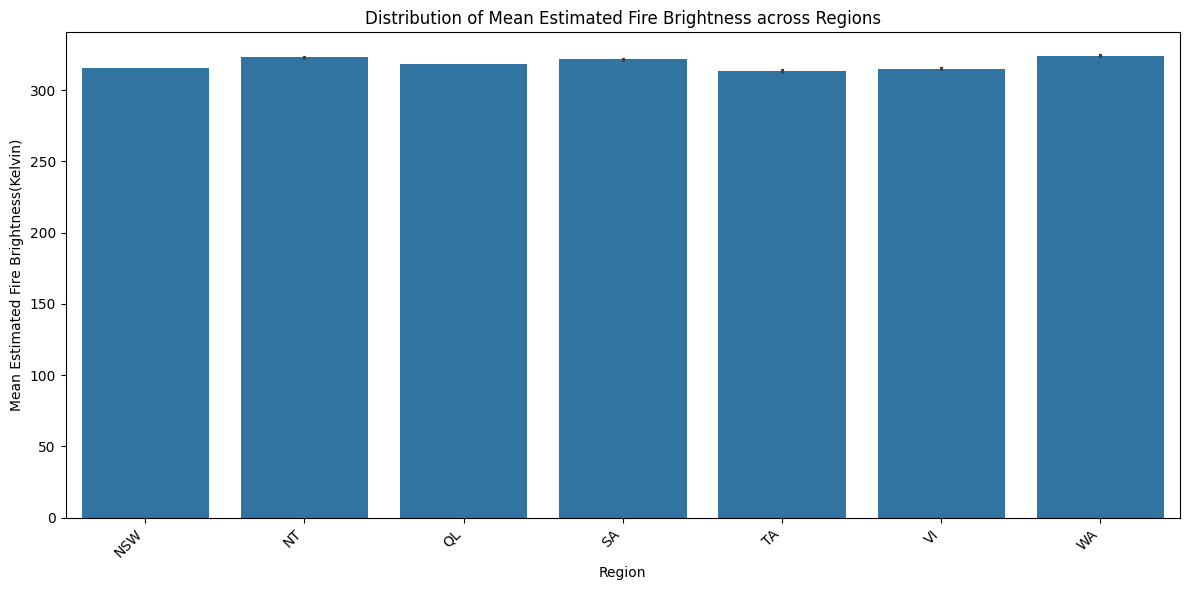

In [15]:


# Group the data by region and calculate the mean estimated fire brightness
mean_fire_brightness_by_region = df.groupby('Region')['Mean_estimated_fire_brightness'].mean()

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness(Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

###  Let's find the portion of count of pixels for presumed vegetation fires vary across regions


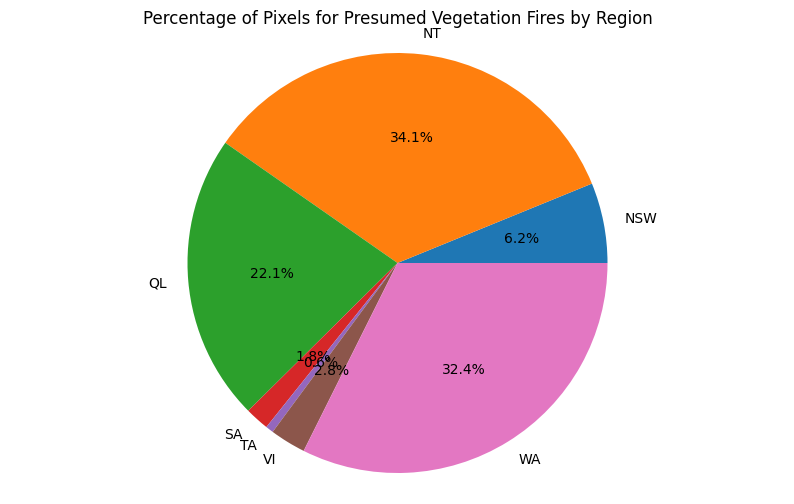

In [16]:
# Creating a pie chart to visualize the portion of count of pixels for presumed vegetation fires across regions
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()


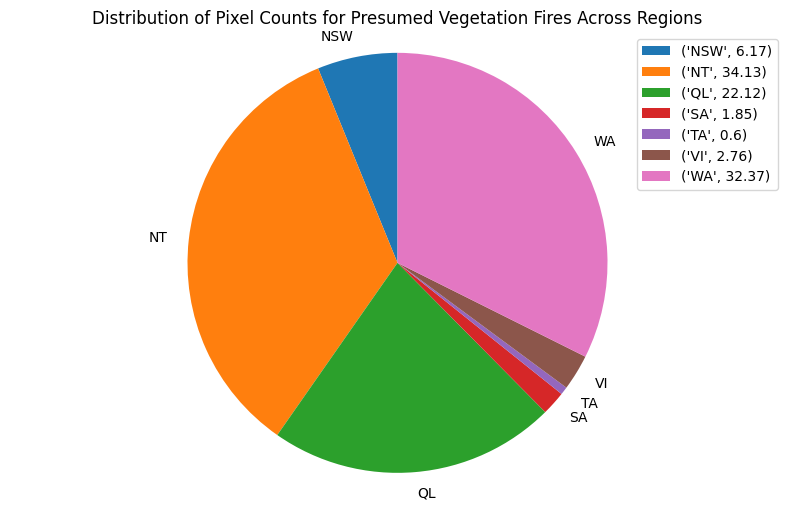

In [17]:
#  See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI

# Group the data by region and calculate the sum of the 'Count' column
region_counts = df.groupby('Region')['Count'].sum()

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index, startangle=90)
plt.title('Distribution of Pixel Counts for Presumed Vegetation Fires Across Regions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.show()

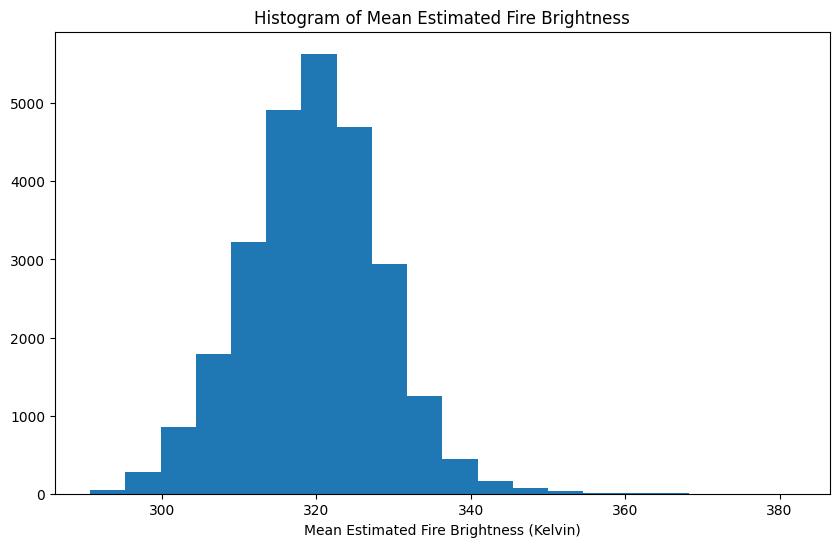

In [18]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness
plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()


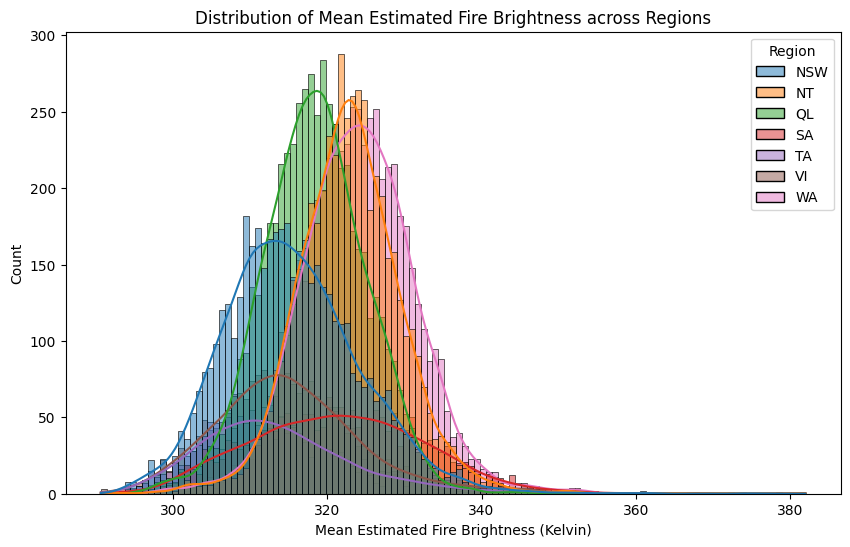

In [19]:
# Create the plot with region as hue
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', kde=True)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()


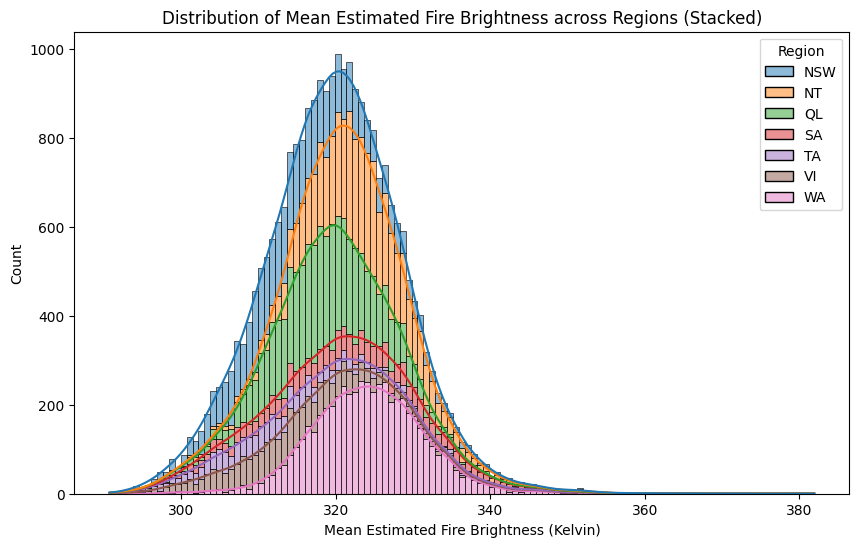

In [20]:
# Create the plot with region as hue and stacked histograms
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack', kde=True)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions (Stacked)')
plt.show()


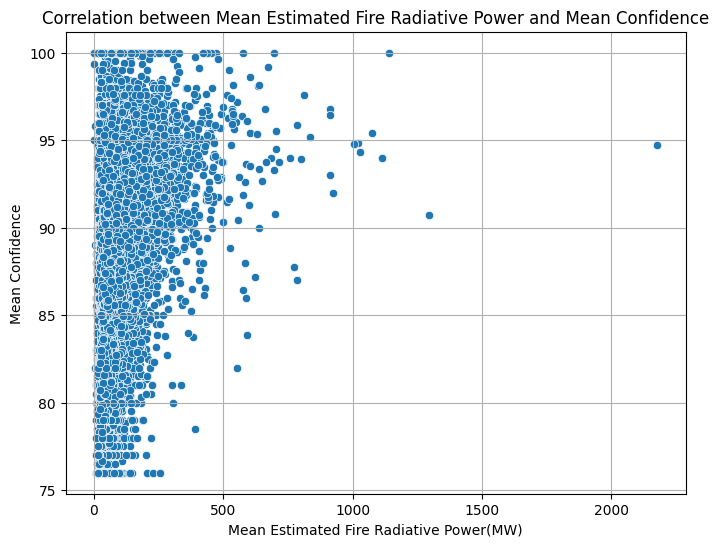

In [21]:
#  Develop a scatter plot to find the correlation between mean estimated fire radiative power and mean confidence level
# Create the scatter plot
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='Mean_estimated_fire_radiative_power', y= 'Mean_confidence')

plt.xlabel('Mean Estimated Fire Radiative Power(MW)')

plt.ylabel('Mean Confidence')

plt.title('Correlation between Mean Estimated Fire Radiative Power and Mean Confidence')
plt.grid(True)
plt.show()

In [24]:
df['Mean_estimated_fire_radiative_power'].corr(df['Mean_confidence'])


0.452321891598643

###  Let's mark these seven regions on the Map of Australia


In [22]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg


,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [23]:


# Create a map centered on Australia
australia_map = folium.Map(location=[-25, 135], zoom_start=4)

# Add markers for each region affected by wildfires
for index, row in reg.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Lon']],
        popup=row['region'],  # Display region name in the popup
        icon=folium.Icon(color="red", icon="fire") # Customize the marker icon
    ).add_to(australia_map)

# Display the map
australia_map